Importing some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uploading the dataset

In [2]:
df = pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Couting the catagorycal column

In [3]:
df.State.nunique()

3

In [4]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
df.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

Chicking for the null valules

In [6]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Data visualizations part

<ipython-input-8-2502f6b20bc3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Profit)


<Axes: xlabel='Profit', ylabel='Density'>

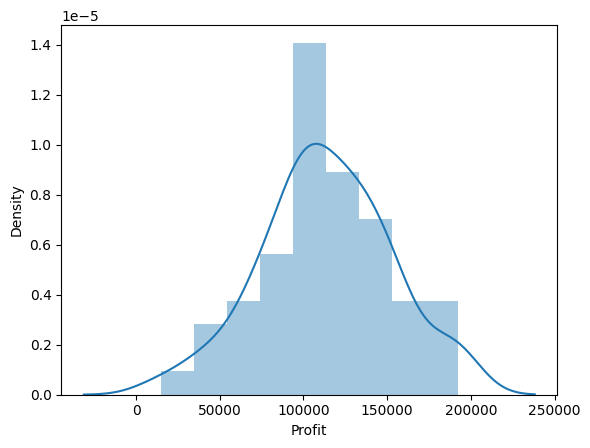

In [8]:
# univariate analysis
sns.distplot(df.Profit)

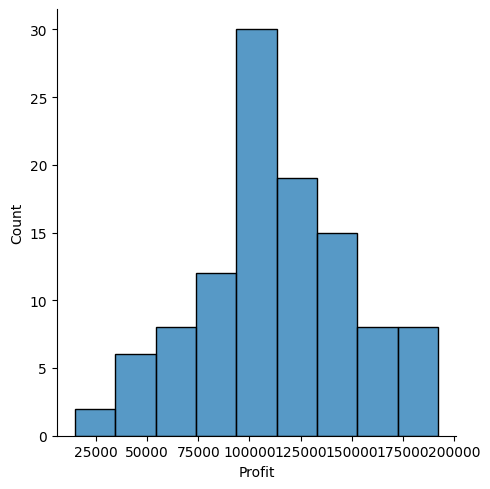

In [9]:
sns.displot(df.Profit)

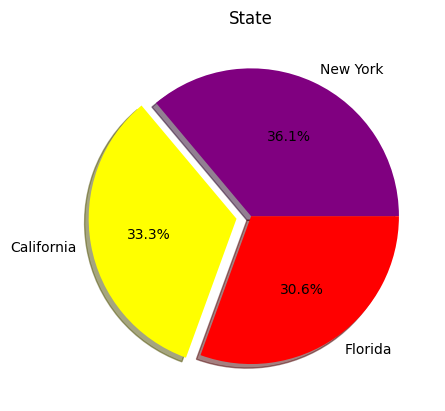

In [10]:

plt.pie(df.State.value_counts(),[0,0.1,0],labels = ['New York','California','Florida'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow','Red'],)
plt.title('State')
plt.show()

<Axes: ylabel='State'>

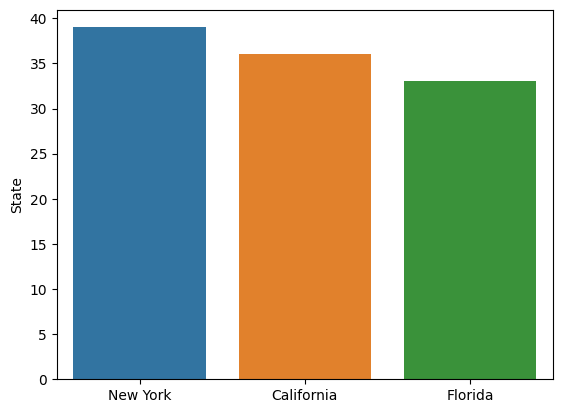

In [11]:
sns.barplot(x=df.State.value_counts().index,y=df.State.value_counts())

Bivariate analysis

<Axes: xlabel='Profit', ylabel='Administration'>

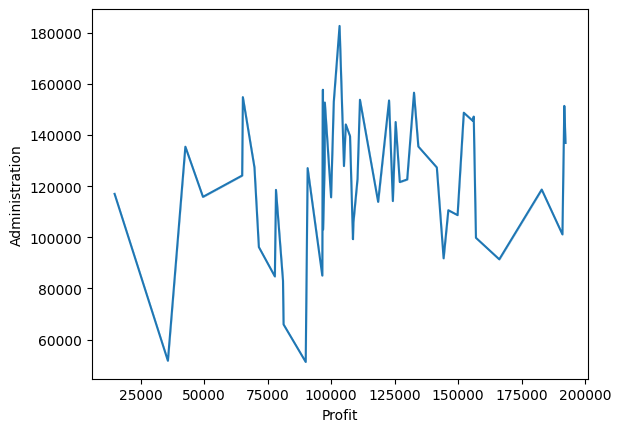

In [12]:
sns.lineplot( x=df.Profit,y=df.Administration )

<Axes: xlabel='Profit', ylabel='Administration'>

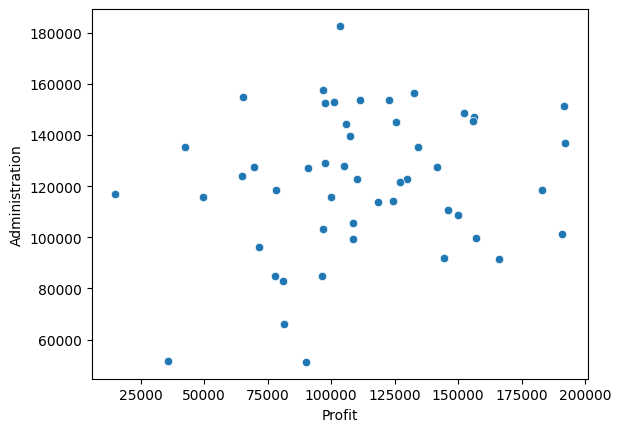

In [13]:
sns.scatterplot(x=df.Profit,y=df.Administration)

Multivariate analysis

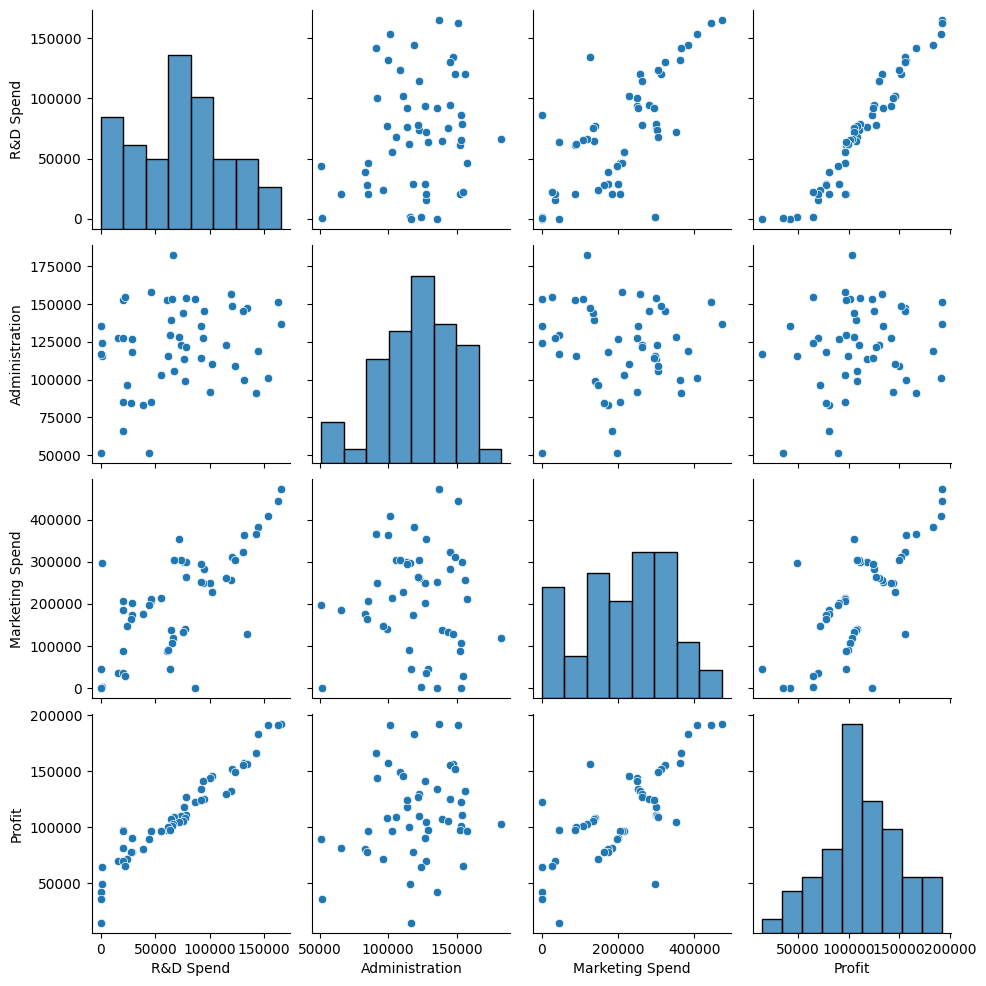

In [14]:
sns.pairplot(df)

<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

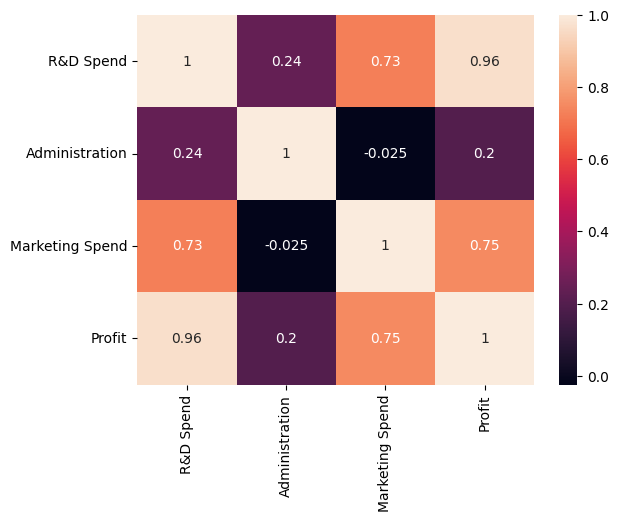

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


Outlier dectections

<Axes: >

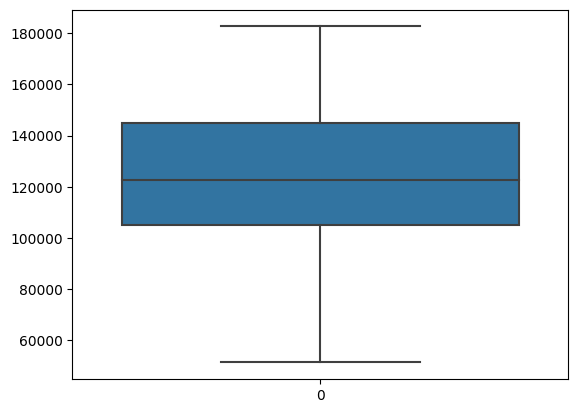

In [17]:
sns.boxplot(df["Administration"])

<Axes: >

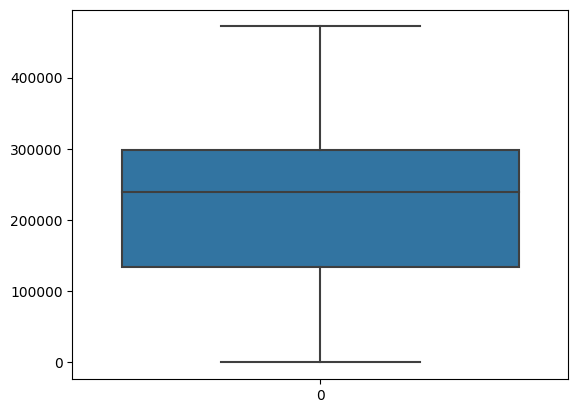

In [18]:
sns.boxplot(df['Marketing Spend'])

<Axes: >

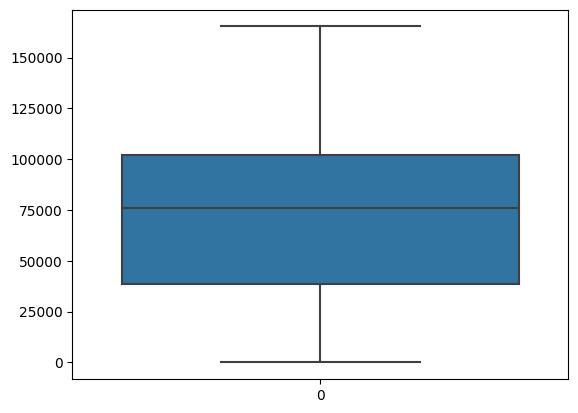

In [19]:
sns.boxplot(df['R&D Spend'])

<Axes: >

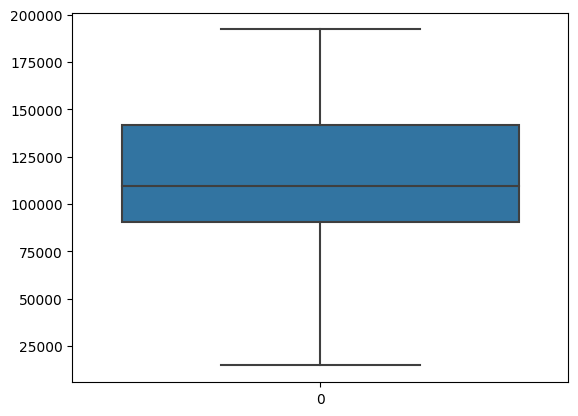

In [20]:
sns.boxplot(df['Profit'])

Here the state is catagorycal column so we need to encode it

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
df.State = le.fit_transform(df.State)

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


on hot conding

In [25]:
df_main = pd.get_dummies(df,columns =['State'])
df_main.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


spliting the dependent and independent variable

In [26]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [27]:
X= df.drop(columns = ['Profit'],axis =1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


Scaleing

In [28]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()

In [29]:
X_scaled =pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


Testing and traning

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state =0)

In [31]:
x_train.shape

(86, 4)

In [32]:
x_test.shape

(22, 4)

In [33]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State
84,-1.651331,0.088332,-1.814870,1.167315
10,0.601813,-0.410238,0.121034,-0.033352
75,-1.033670,0.195084,-0.117776,-0.033352
2,1.752320,-0.757668,1.643929,-0.033352
24,0.046546,-0.826216,-0.633593,1.167315


In [34]:
y_test

84      64926.08
10     146121.95
75      90708.19
2      191050.39
24     108552.04
100    144259.40
107    124266.90
7      155752.60
16     126992.93
86      42559.73
68     101004.64
22     110352.25
45      64926.08
60     111313.02
76      89949.14
52     134307.35
13     134307.35
73      96712.80
85      49490.75
54     129917.04
103    132602.65
8      152211.77
Name: Profit, dtype: float64

Model building

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
y_predict = lr.predict(x_test)
y_predict

array([ 48379.24868386, 134848.9192467 ,  76483.10965225, 181561.78529188,
       112966.00035112, 134241.68257226, 129222.38731942, 160017.05919784,
       116752.96050775,  46260.9926407 , 102266.36060189, 115568.27177598,
        48379.24868386, 119114.16525526,  88602.22002789, 127101.40273623,
       127101.40273623,  90942.33421515,  58677.7334991 , 146304.26215166,
       149410.05441   , 152502.87810448])

In [38]:
y_predict1 =lr.predict(x_train)
y_predict1

array([110339.36711747, 171326.34156933,  98169.73349428, 173984.89235457,
       116394.84120632,  48728.97472674,  98701.8096438 , 155793.74222107,
        83173.3979165 , 193329.17668167, 188881.89497877, 163705.08384309,
       129123.46097713, 116687.20083441, 116394.84120632, 129222.38731942,
       115568.27177598, 129123.46097713, 112966.00035112,  97478.45007514,
        60870.14590928, 188881.89497877,  75059.36096014,  70421.48595141,
        75026.31650688, 171326.34156933, 146304.26215166, 131295.5367997 ,
        75059.36096014,  70560.72299298, 163705.08384309, 149410.05441   ,
       134848.9192467 , 131295.5367997 , 193329.17668167,  89793.68742016,
       102116.15226573, 116752.96050775, 134241.68257226, 134241.68257226,
       110757.21399109,  91210.10094151, 110757.21399109,  98105.33260626,
       152502.87810448, 129222.38731942,  64558.26417224, 173984.89235457,
        97478.45007514, 181561.78529188, 149410.05441   ,  71079.10061908,
       114687.4839992 , 1

In [39]:
profit=pd.DataFrame({'Actual_profit':y_test,'Predicted_profit':y_predict})
profit

,Actual_profit,Predicted_profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [40]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Random value

In [41]:
lr.predict([[165349.20,136897.80,471784.10,2]])/100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([77189.78815617])

Evaluation metrics for Regression Problem

In [42]:
from sklearn import metrics

In [43]:
# R- Square
# evaluating testing accuracy
print(metrics.r2_score(y_test,y_predict))


0.9258962347553816


In [44]:
# evaluating traing accuracy

print(metrics.r2_score(y_train,y_predict1))


0.937696994680168


In [45]:
# MSE (Mean square Error)

print(metrics.mean_squared_error(y_test,y_predict))

96015241.54707724


In [46]:
# RMSE (Root Mean Square Error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


9798.7367322057
